/kaggle/input/crop-rec/Crop_recommendation.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


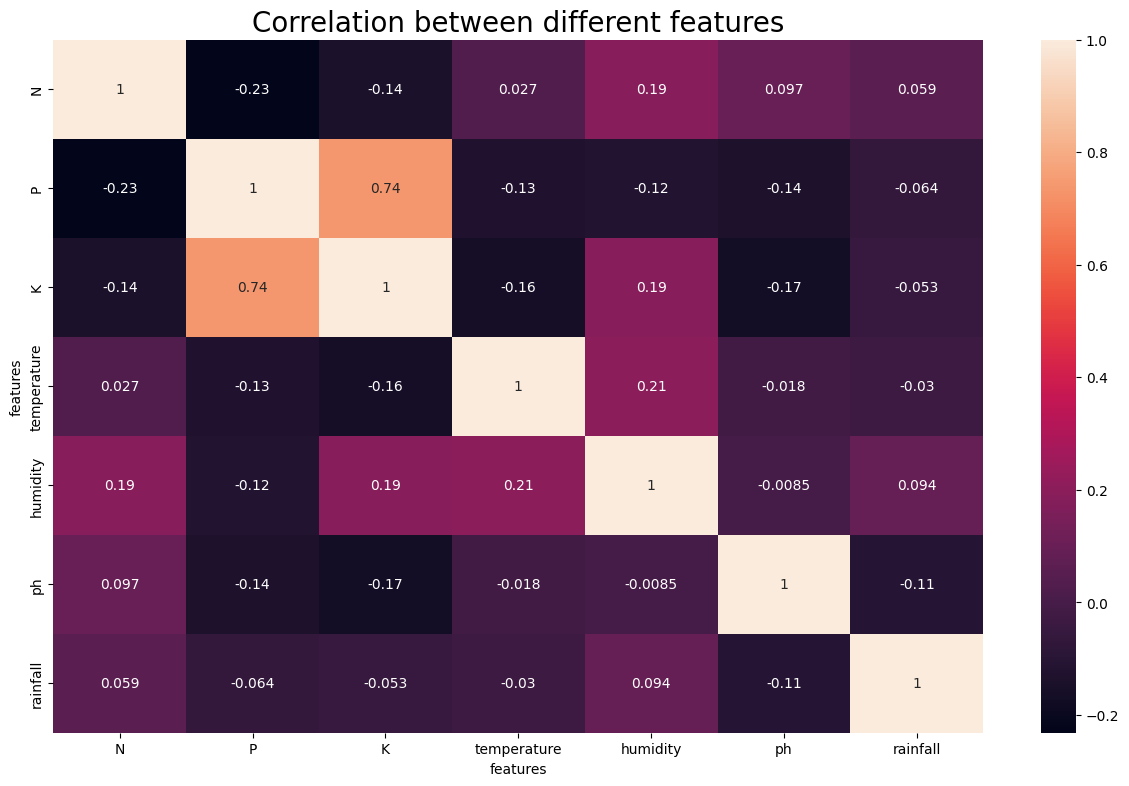

       label
0       rice
1       rice
2       rice
3       rice
4       rice
...      ...
2195  coffee
2196  coffee
2197  coffee
2198  coffee
2199  coffee

[2200 rows x 1 columns]
[20 20 20 ...  5  5  5]
Decoded Labels: ['rice' 'rice' 'rice' ... 'coffee' 'coffee' 'coffee']
LogisticRegression 0.9504132231404959
DecisionTreeClassifier 0.9724517906336089
XGBClassifier 0.9793388429752066
GradientBoostingClassifier 0.9848484848484849
KNeighborsClassifier 0.9752066115702479
RandomForestClassifier 0.9931129476584022


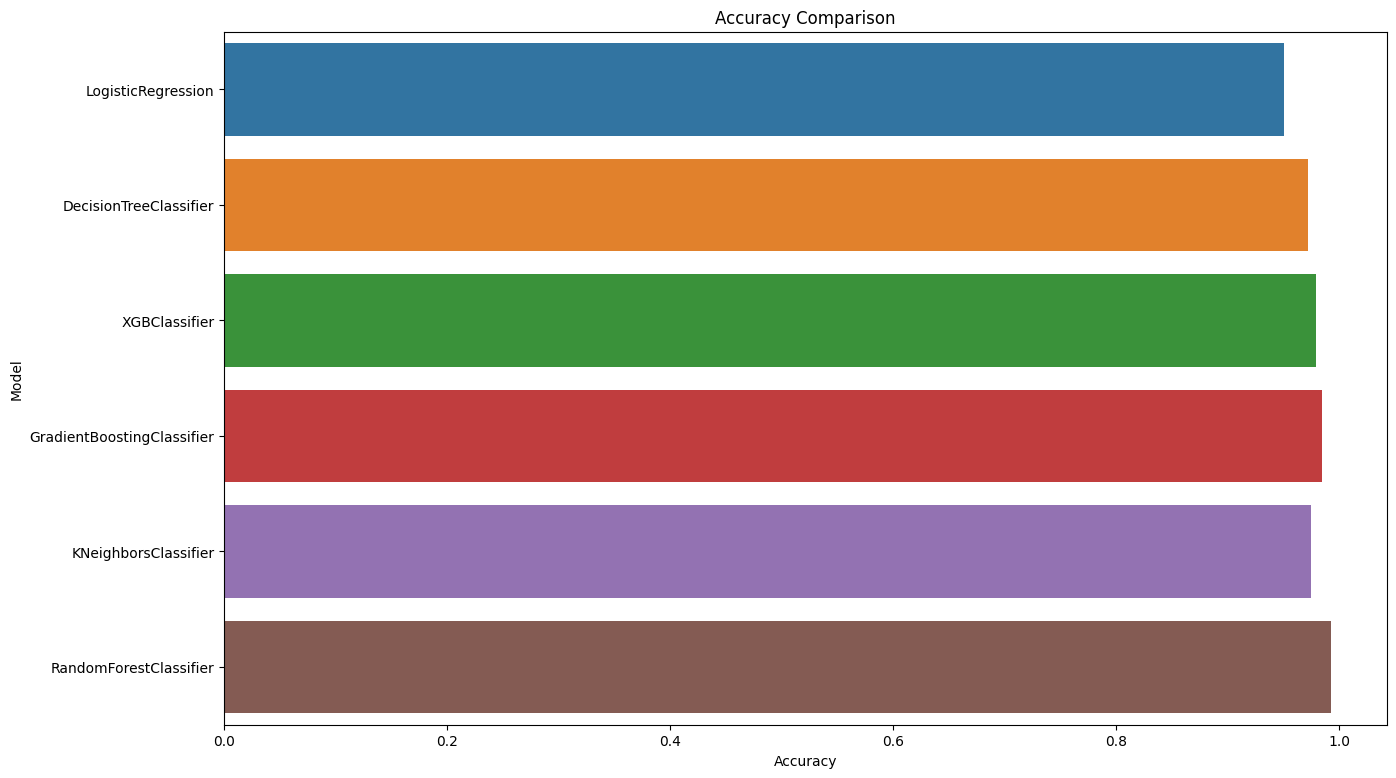

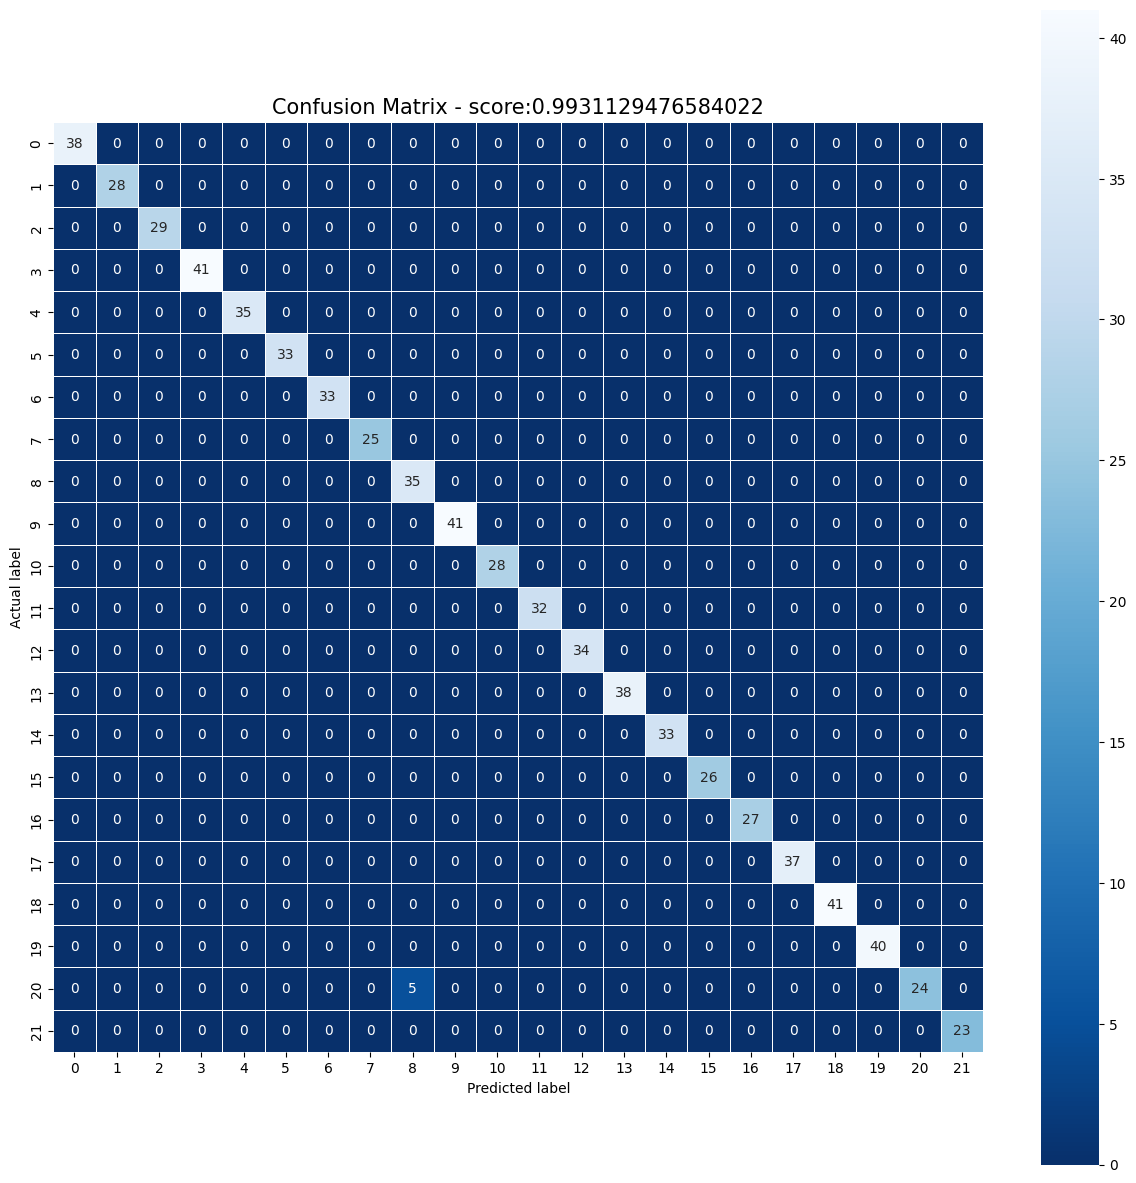

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        25
           8       0.88      1.00      0.93        35
           9       1.00      1.00      1.00        41
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        34
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        27
          17       1.00    

In [2]:
import plotly.offline as pyo

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import plotly.graph_objs as go
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/crop-rec/Crop_recommendation.csv')
df.head()

df.shape
df.info()
df.describe()

#correln between the features of the dataset

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
numdf = df.drop('label',axis=1)
sns.heatmap(numdf.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()

#we start building the model here

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

target = ['label']
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

label_encoder = LabelEncoder()
numerical_target = label_encoder.fit_transform(df[target])

print(df[['label']])
print(numerical_target)
df['numerical_label']=numerical_target
# Mapping back from numerical to original labels
decoded_labels = label_encoder.inverse_transform(numerical_target)
print("Decoded Labels:", decoded_labels)

X = df[features]
y = df[['numerical_label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0)))
models.append(('XGBClassifier', XGBClassifier(random_state=0)))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=0)))

model_name = []
accuracy = []

for name, model in models: 
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_name.append(name)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    print(name, metrics.accuracy_score(y_test,y_pred))

plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = accuracy, y = model_name)
plt.show()

model=RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [3]:
final_model = RandomForestClassifier(random_state=0)
final_model.fit(X,y)

# Function to get user input  
def get_user_input():  
    print("Please enter the following environmental parameters:")  
    N = float(input("Nitrogen (N) content in soil (kg/ha): "))  
    P = float(input("Phosphorus (P) content in soil (kg/ha): "))  
    K = float(input("Potassium (K) content in soil (kg/ha): "))  
    temperature = float(input("Temperature (°C): "))  
    humidity = float(input("Humidity (%): "))  
    ph = float(input("pH level of the soil: "))  
    rainfall = float(input("Rainfall (mm): "))  
    return [N, P, K, temperature, humidity, ph, rainfall]  

# Get user input  
user_input = get_user_input()  

# Convert to DataFrame for model prediction  
user_input_df = pd.DataFrame([user_input], columns=features)  

# Predict the crop  
predicted_label_numeric = final_model.predict(user_input_df)  
predicted_label = label_encoder.inverse_transform(predicted_label_numeric)  

# Display the result  
print(f"The recommended crop for the given conditions is: {predicted_label[0]}")  

Please enter the following environmental parameters:


Nitrogen (N) content in soil (kg/ha):  69
Phosphorus (P) content in soil (kg/ha):  58
Potassium (K) content in soil (kg/ha):  43
Temperature (°C):  20
Humidity (%):  40
pH level of the soil:  7
Rainfall (mm):  120


The recommended crop for the given conditions is: coffee
